# [Prof. Isabel H. Manssour](mailto:isabel.manssour@pucrs.br)

## Disciplina: Visualização de Dados - Turma 30

## Descrição: **Exercícios de árvores, fluxos e redes**

**Fazer *imports* necessários**

Inicialmente faremos todos os *imports* necessários para realizar estes exercícios.

In [1]:
import plotly.express as px
import plotly.graph_objs as go
import networkx as nx
import pandas as pd

**Carregar dados**

Para estes exercícios vamos usar o conjunto de dados do Titanic, disponível em https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv e que contém informações sobre os passageiros e a tripulação, sobreviventes ou não. Este conjunto de dados é bastante usado para ilustrar o funcionamento das representações visuais.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


▶ **Gráfico de *Sunburst***

É uma representação visual que representa uma hierarquia através de uma série de anéis que são divididos para cada nodo.

No *Plotly Express* usamos a função *sunburst* para criar este gráfico, conforme mostra o exemplo abaixo.

Informações deste tipo de gráfico estão disponíveis em:
*   https://plotly.com/python/sunburst-charts/
*   https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html

In [3]:
fig = px.sunburst(df, path=['Pclass', 'Sex', 'Survived'])
fig.show()

**# Exercício 1**

Inicialmente interaja com o gráfico acima. Experimente clicar nos anéis mais internos para ver o que acontece.

Depois, acrescente o comando abaixo antes de chamar a função *sunburst* para que sejam colocados os rótulos "Pclass" no lugar dos números daqui para frente quando este DataFrame (*df*) for usado.

```
# Método *replace* substitui valores em um DataFrame
df['Pclass'] = df['Pclass'].replace({1:"Pclass1", 2:"Pclass2", 3:"Pclass3"})
```

Experimente também alterar o tamanho do gráfico e da fonte através do comando abaixo. Lembre que é importante saber alterar o tamanho da fonte para gerar imagens para relatórios, pois elas sempre devem ficar legíveis.

```
fig.update_layout(height=600, font_size=15)
```

In [5]:
#seg parte
df['Pclass'] = df['Pclass'].replace({1:"Pclass1", 2:"Pclass2", 3:"Pclass3"})

df.head()

fig = px.sunburst(df, path=['Pclass', 'Sex', 'Survived'])
fig.update_layout(height=600, font_size=15)
fig.show()

In [4]:
#prim parte
df['Pclass'] = df['Pclass'].replace({1:"Pclass1", 2:"Pclass2", 3:"Pclass3"})

df.head()

fig = px.sunburst(df, path=['Pclass', 'Sex', 'Survived'])
fig.show()

**# Exercício 2**

Crie uma nova célula de código abaixo, acrescente a faixa etária dos sobreviventes (1) e dos que morreram (0), como exemplifica o código a seguir e gere um novo gráfico *sunburst*.

```
# Faz uma cópia do Dataframe lido.
dft = df.copy()
bins = [0, 18, 30, 50, 100]
labels = ["0-18", "18-30", "30-50", "50+"]
# Método *cut* do Pandas é usado para segmentar e agrupar os valores de uma ou
# mais colunas em intervalos (*bins*) definidos pelo usuário ou com base em quantis.
# Usado para discretizar dados contínuos, ou seja, converter variáveis contínuas
# em variáveis categóricas ou em intervalos de valores.
dft["Age Range"] = pd.cut(dft["Age"], bins=bins, labels=labels)

dft = dft.groupby(['Pclass', 'Sex', 'Survived', 'Age Range'], as_index=False)['Fare'].sum()

fig = px.sunburst(dft, path=['Pclass', 'Sex', 'Survived', 'Age Range'], values='Fare')
fig.show()
```

Analise o gráfico para verificar o gênero e faixa etária com menos sobreviventes.

In [7]:
dft = df.copy()

bins = [0, 18, 30, 50, 100]
labels = ["0-18", "18-30", "30-50", "50+"]

dft["Age Range"] = pd.cut(dft["Age"], bins=bins, labels=labels)

dft = dft.groupby(['Pclass', 'Sex', 'Survived', 'Age Range'], as_index=False)['Fare'].sum()

fig = px.sunburst(dft, path=['Pclass', 'Sex', 'Survived', 'Age Range'], values='Fare')
fig.show()

▶ **Gráfico *icicle***

Este gráfico representa a hierarquia através da conexão entre áreas (ou retângulos) que são organizados da raiz às folhas.

No *Plotly Express* usamos a função *icicle* para criar esta representação visual, como mostra o exemplo da célula de código a seguir. Passando -1 para o parâmetro *maxdepth*, todos os níveis na hierarquia são desenhados. Senão, um valor inteiro positivo vai definir o número de setores que serão renderizados. O parâmetro *branchvalues* controla como os valores nos "ramos" são tratados em relação à soma total dos valores. Quando definido como *total*, a altura dos retângulos é proporcional à soma total dos valores dos seus descendentes.

Informações deste tipo de gráfico estão disponíveis em:
*   https://plotly.com/python/icicle-charts/
*   https://plotly.com/python-api-reference/generated/plotly.express.icicle.html

In [ ]:
fig =px.icicle(df, path=['Pclass', 'Sex', 'Survived'], maxdepth=-1, branchvalues="total")
fig.show()

**Exercício 3)**

Interaja com o gráfico acima. Experimente selecionar diferentes áreas e veja o que acontece.

Coloque o comando abaixo antes de *fig.show()*, execute a célula e veja o que acontece. Altere também o tamanho da fonte para que fique maior. Para estabelecer um tamanho mínimo para a fonte, acrescente o parâmetro *uniformtext=dict(minsize=11, mode='hide')* quando o tamanho da fonte for alterado.

```
fig.update_traces(root_color="lightgrey")
```

Depois, troque o valor do parâmetro *branchvalues* de "*total*" para "*remainder*" e veja diferença. Troque também o valor do parâmetro *maxdepth* para 1 e para 2. A cada alteração, execute a célula novamente.

Acrescente também o parâmetro abaixo para trocar as cores do gráfico. Você pode ver outras alternativas de cores em https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express.

```
color_discrete_sequence=px.colors.qualitative.Set2
```

Também é possível alterar a orientação do icicle acrescentando o código abaixo antes de fig.show().

```
fig.update_traces(tiling_orientation='v')
```

In [8]:
fig = px.icicle(df, path=['Pclass', 'Sex', 'Survived'], maxdepth=-1, branchvalues="total")

fig.update_traces(root_color="lightgrey")

fig.update_layout(uniformtext=dict(minsize=11, mode='hide'))

fig.show()

In [9]:
fig = px.icicle(df, path=['Pclass', 'Sex', 'Survived'], maxdepth=2, branchvalues="remainder")

fig.update_traces(root_color="lightgrey")

fig.update_layout(uniformtext=dict(minsize=11, mode='hide'))

fig.show()

In [10]:
fig = px.icicle(df, path=['Pclass', 'Sex', 'Survived'], maxdepth=1, branchvalues="remainder")

fig.update_traces(root_color="lightgrey")

fig.update_layout(uniformtext=dict(minsize=11, mode='hide'))

fig.show()

▶ ***Treemap***

O *treemap* é uma forma de visualizar uma estrutura hierárquica como um conjunto de retângulos aninhados.

O código abaixo ilustra como criar um *treemap*.

Informações deste tipo de gráfico estão disponíveis em:
*   https://plotly.com/python/treemaps/
*   https://plotly.com/python-api-reference/generated/plotly.express.treemap.html

In [ ]:
fig = px.treemap(df, path=['Pclass', 'Sex', 'Survived'])
fig.show()

**Exercício 4)**

Crie uma célula de código abaixo, copie o código acima e inclua o seguinte comando antes de exibir o gráfico:

```
fig.update_traces(marker=dict(cornerradius=5))
```

Execute e veja o que acontece.

Tente também personalizar as cores, por exemplo, incluindo o parâmetro *color* e e selecionando o gêneros (*color='Sex'*) e o parâmetro *color_discrete_map* para associar uma cor a cada possível valor (por exemplo: *color_discrete_map={'(?)':'lightgrey', 'male':'cyan', 'female':'blue'}*).

Altere o código para que ao invés de "1" e "0", seja colocado "Survived" e "Died" no *Treemap*, respectivamente.

In [11]:
fig = px.treemap(df, path=['Pclass', 'Sex', 'Survived'])
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

**Exercício 5)**

Agora vamos ver como gerar os gráficos acima para o conjunto de dados *gapminder* disponível no *plotly.express.data package* (https://plotly.com/python-api-reference/generated/plotly.express.data.html). Este pacote disponibiliza conjuntos de dados integrados para fins de demonstração, educacionais e de teste.

O *gapminder* contém informações sobre indicadores socioeconômicos para países de todo o mundo ao longo do tempo. Ele inclui as seguintes colunas:


*   ***country***: Nome do país;
*   ***continent***: Continente ao qual o país pertence;
*   ***year***: Ano do registro;
*   ***lifeExp***: Expectativa de vida no nascimento;
*   ***pop***: População total;
*   ***gdpPercap***: PIB per capita em dólares americanos;
*   ***iso_alpha***: códigos ISO 3166-1 alfa-3, que são as três letras que representam os países.

Crie uma célula de código abaixo, crie um novo DataFrame para este conjunto de dados e gere um *treemap* que represente a população por continente e país em 2007.

Experimente definir a cor pela expectativa de vida para trazer mais informações ao gráfico e use, por exemplo, o parâmetro abaixo para especificar a escala de cor.

```
color_continuous_scale='RdBu'
```

**Exercício 6)**

Gere também um gráfico *icicle* e um gráfico *sunburst* para os dados do *gapminder*. Use as mesmas configurações de cores do treemap e verifique qual foi a visualização mais efetiva.

▶ **Gráfico *Parallel Categories***

Esta representação visual é usada para exibir relações entre múltiplas variáveis categóricas, usando linhas paralelas para conectar categorias semelhantes em diferentes dimensões.

No *Plotly Express* usamos a função *parallel_categories* para criar este tipo de gráfico, conforme ilustra o exemplo abaixo.

Informações deste tipo de gráfico estão disponíveis em:
*   https://plotly.com/python/parallel-categories-diagram/
*   https://plotly.com/python-api-reference/generated/plotly.express.parallel_categories.html

In [13]:
fig = px.parallel_categories(df, dimensions=['Sex', 'Pclass', 'Survived'], color='Survived')
fig.show()

**# Exercício 7**

Após interagir com o gráfico acima, experimente trocar a escala de cores usada usando o parâmetro *color_continuous_scale* e acrescente um título para o gráfico. Veja que é possível trocar dos "eixos" do gráfico.

▶ **Diagrama de *Sankey***

Este gráfico possibilita a visualização de fluxos ou conexões/relações. É preciso ter uma  origem(*source*) e um destino (*target*), e pode ter outras variáveis no meio.

Nas células de código abaixo tem um exemplo de como organizar os dados para representá-los usando um diagrama de Sankey.

Informações deste tipo de gráfico estão disponíveis em:
*   https://plotly.com/python/sankey-diagram/
*   https://plotly.com/python-api-reference/generated/plotly.graph_objects.Sankey.html

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

fig = px.parallel_categories(df, dimensions=['Sex', 'Pclass', 'Survived'], color='Survived')
fig.update_layout(title="Titanic Passenger Analysis")
fig.show()

In [16]:
# Objetivo: verificar quantos homens morreram.
# Fluxo: Classe -> Gênero -> Sobreviveu/Morreu

# Cria dataframe temporário. Passa a fonte e a "segunda coluna".
# Coloca a classe e o gênero, e quer contar baseado neste grupo,
# por isso adiciona nome e reseta o índice.
df_temp1 = df.groupby(["Pclass", "Sex"])["Name"].count().reset_index()
# Troca os nomes das colunas
df_temp1.columns = ["source", "target", "value"]
# Converte 1, 2 e 3 em Pclass1, Pclass2 e Pclass3.
df_temp1["source"] = df_temp1.source.map({1 : "Pclass1", 2:"Pclass2", 3:"Pclass3"})
df_temp1

,source,target,value
0,Pclass1,female,9
1,Pclass1,male,21
2,Pclass2,female,12
3,Pclass2,male,18
4,Pclass3,female,35
5,Pclass3,male,61


In [17]:
# Agora tem gênero como source e survived or not como target
df_temp2 = df.groupby(["Sex", "Survived"])["Name"].count().reset_index()
# Troca os nomes das colunas
df_temp2.columns = ["source", "target", "value"]
# Converte 1 e 2 em Suvived e Died.
df_temp2["target"] = df_temp2.target.map({1 : "Survived", 0:"Died"})
df_temp2

,source,target,value
0,female,Died,16
1,female,Survived,40
2,male,Died,86
3,male,Survived,14


In [19]:
# Junta os dois dataframes temporários em um novo dataframe.
links = pd.concat([df_temp1, df_temp2], axis=0)

# Modificações para funcionar com plotly.
# Passa os valores do dataframe para links source->target. Cria valores únicos.
unique_source_target = list(pd.unique(links[["source","target"]].values.ravel("k")))

# Faz um mapeamento entre os valores únicos (cria um dicionário).
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

# Cria links "origem" -> "destino"
links["source"] = links["source"].map(mapping_dict)
links["target"] = links["target"].map(mapping_dict)

# Cria um dicionário onde o nome de cada coluna é a chave e
# cada valor dentro da coluna é basicamente uma lista;
links_dict = links.to_dict(orient="list")

In [20]:
fig = go.Figure(data=[go.Sankey(
                        node = dict(
                                pad = 15,
                                thickness = 20,
                                line = dict(color = "black", width = 0.5),
                                label =  unique_source_target,
                                color =  "blue"
                               ),
                        link = dict(
                               source =  links_dict["source"],
                               target =  links_dict["target"],
                               value =  links_dict["value"]
                               )
                         )
                    ])

fig.update_layout(title_text="Sankey", font_size=10)
fig.show()

**# Exercício 8**

Interaja com o gráfico acima movimentando os seus "nós".

Depois, experimente alterar o código acima removendo o parâmetro *color = "blue"* para ver o que acontece. Em seguinda, inclua cor nos *links* e troque as cores para que fique da seguinte maneira:
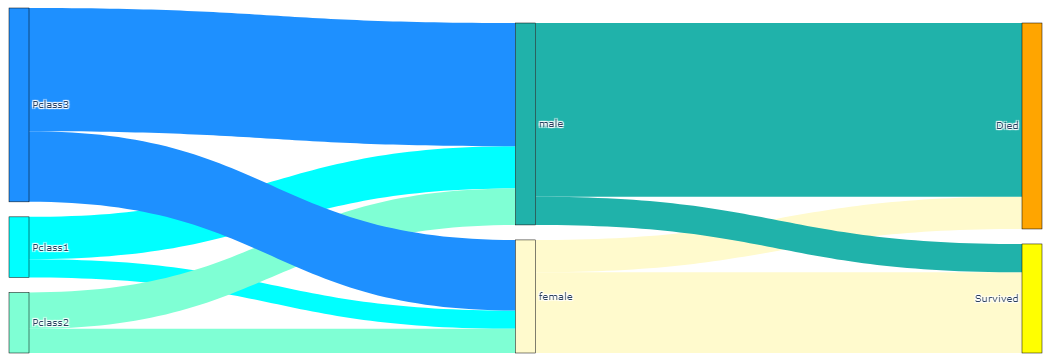

Para isto crie o seguinte array de cores:
```
colors = ['cyan', 'aquamarine', 'dodgerblue', 'lemonchiffon', 'lightseagreen', 'orange', 'yellow']
```

Depois inclua o parâmetro
```
color = colors
```
em *node*, e o parâmetro
```
color = [colors[source] for source in links_dict["source"]]
```
em *link*.

Altere o valor do parâmetro *thickness* para 10 e 30 e veja o que acontece.


▶ ***Network Graph***

Para fazer gráficos de rede em Python com a Plotly, vamos usar o NetworkX (https://networkx.org/documentation/stable/index.html), um pacote Python para criação, manipulação e estudo de redes.

O exemplo abaixo exemplifica como criar um gráfico de rede. Está sendo usado o gráfico de rede dos personagens do romance "Os Miseráveis".

In [22]:
# Carregar o grafo do dataset "les miserables"
G = nx.les_miserables_graph()

# Definir posições dos vértices utilizando o layout Fruchterman-Reingold
# (algoritmo de posicionamento de vértices em um grafo que busca distribuir
# os vértices de forma a minimizar o cruzamento de arestas e manter distâncias
# equilibradas entre eles)
pos = nx.spring_layout(G)

# Criar as arestas do gráfico
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Criar os vértices do gráfico
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

# Criar o gráfico
fig = go.Figure()

# Adicionar as arestas
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(color='rgb(125,125,125)', width=1), hoverinfo='none'))

# Adicionar os vértices
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(symbol='circle', size=10, color='rgb(50,50,50)', line=dict(color='rgb(50,50,50)', width=0.5)), hoverinfo='text', text=node_text))

# Atualizar layout do gráfico
fig.update_layout(title='Gráfico de rede: "Les Miserables"',
                  title_x=0.5,
                  title_font_size=20,
                  showlegend=False,
                  plot_bgcolor='white')

# Mostrar o gráfico
fig.show()

**Exercício 9)**

Interaja com o gráfico de rede acima através das funcionalidades de *zoom* e *mouse over*.

Agora vamos customizar o gráfico aumentando o tamanho dos vértices de acordo com a quantidade de interações do personagem. Para isso, primeiro crie:
```
node_size = []
```
Depois, acrescente o seguinte comando na hora de criar os vértices:
```
node_size.append(G.degree[node] * 2)
```
Por fim, atualize o parâmetro *size* para *size=node_size* na chamada da função *fig.add_trace()* para adicionar os vértices.

Execute e veja resultado.

Vamos também colorir os vértices com base no seu grau. Para isso, primeiro crie:
```
node_color = []
```
Em seguida, calcule o grau de cada vértice acrescentando o seguinte comando:
```
node_degree = dict(G.degree())
```
Acrescente o seguinte comando na hora de criar os vértices:
```
node_color.append(node_degree[node])  
```
Por fim, altere o parâmetro *color* para *color=node_color* e acrescente o parâmetro *colorscale='Viridis'* na chamada da função *fig.add_trace()* para criar os vértices.

Execute e veja o resultado!

In [28]:
pos = nx.spring_layout(G)

# Criar as arestas do gráfico
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

node_degree = dict(G.degree())

node_size = [degree * 2 for node, degree in node_degree.items()]

node_color = list(node_degree.values())

fig = go.Figure()

fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(color='rgb(125,125,125)', width=1), hoverinfo='none'))

fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers',
                         marker=dict(symbol='circle', size=node_size, color=node_color,
                                     colorscale='Viridis', colorbar=dict(title='Grau'),
                                     line=dict(color='rgb(50,50,50)', width=0.5)),
                         hoverinfo='text', text=node_text))

fig.update_layout(title='Gráfico de rede: "Les Miserables"',
                  title_x=0.5,
                  title_font_size=20,
                  showlegend=False,
                  plot_bgcolor='white')

fig.show()